In [1]:
import numpy as np
import pandas as pd
import urllib.request


In [2]:
#url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv"
#urllib.request.urlretrieve(url, 'marketing_campaign.csv')


In [3]:
df = pd.read_csv('marketing_campaign.csv',sep=';')
df.head() 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.duplicated().any()

False

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot: ylabel='Density'>

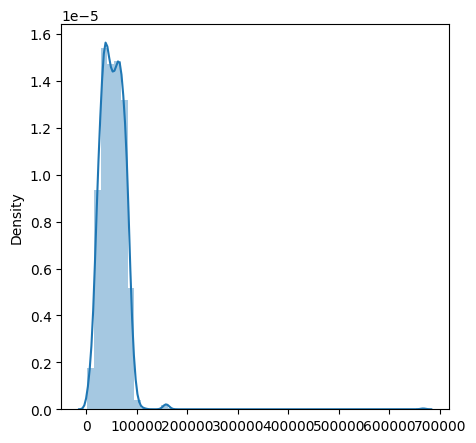

In [10]:
plt.figure(figsize = (5,5))
sns.distplot(x = df['Income'], kde = True)

In [11]:
md = df["Income"].median()
md

51381.5

In [12]:
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [13]:
df = df.fillna({'Income':51381.5})

In [14]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

<AxesSubplot: ylabel='Density'>

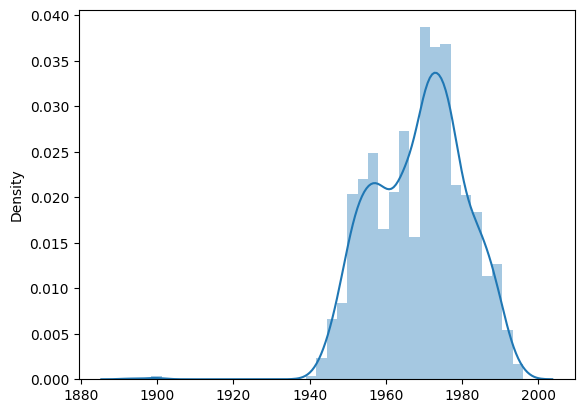

In [15]:
sns.distplot(x = df['Year_Birth'], kde = True)

In [16]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [17]:
df['Education'] = df['Education'].replace(['Graduation', 'PhD', 'Master', '2n Cycle'], 'Post_Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Under_Graduate')

<AxesSubplot: xlabel='Education', ylabel='count'>

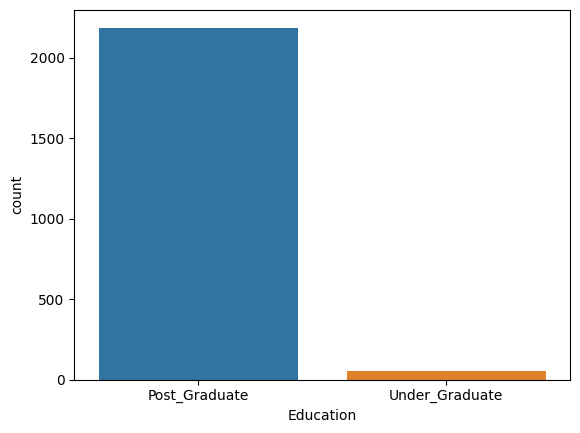

In [18]:
sns.countplot(x= df['Education'])

In [19]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [20]:
df['Marital_Status'] = df['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Together', 'Married'], 'Relationship')

<AxesSubplot: xlabel='Marital_Status', ylabel='count'>

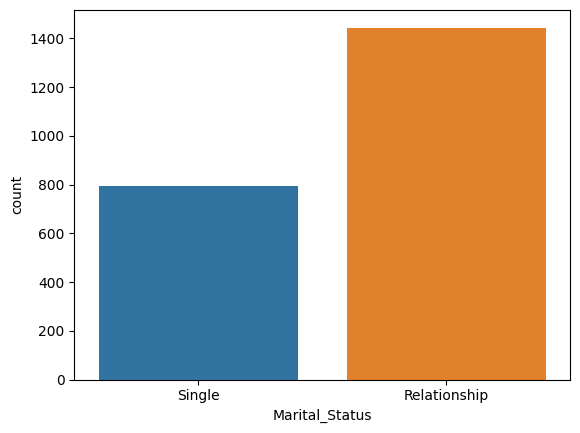

In [21]:
sns.countplot(x = df['Marital_Status'])

In [22]:
df['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [23]:
df['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [24]:
df['Child'] = df['Kidhome'] + df['Teenhome']

<AxesSubplot: xlabel='Child', ylabel='count'>

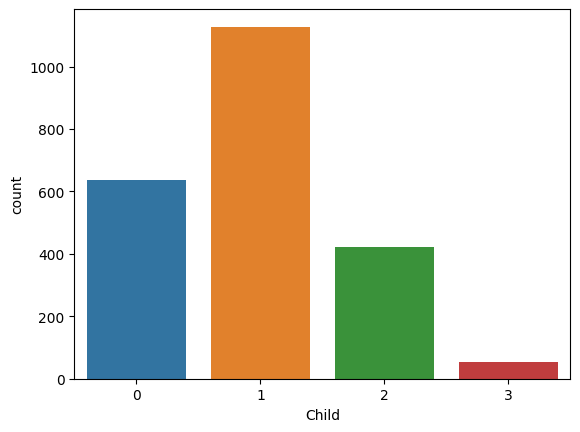

In [25]:
sns.countplot(x = df['Child'])

In [26]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
dates = []
for i in df['Dt_Customer']:
    i= i.date()
    dates.append(i)
print(max(dates))
print(min(dates))

2014-06-29
2012-07-30


In [27]:
days = []
d1 = max(dates)
for i in dates:
    j = d1 - i
    days.append(j)
df["Customer_days"] = days
df['Customer_days'] = df['Customer_days'].apply(lambda x:x.days)

In [28]:
       
df['Total_Amount'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

<AxesSubplot: xlabel='Total_Amount', ylabel='Density'>

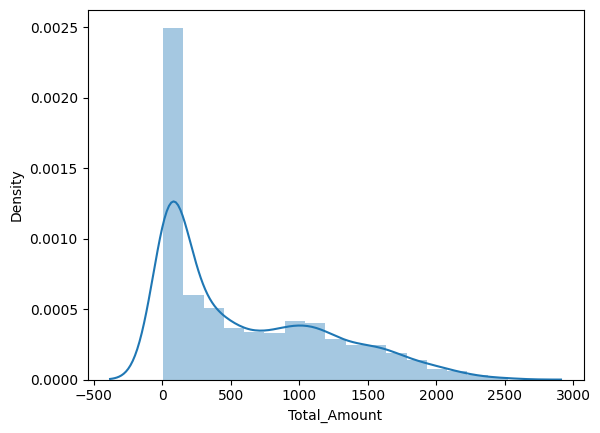

In [29]:
sns.distplot(df['Total_Amount'], kde = True)

In [30]:
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']

In [31]:
df['Total_offer'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [32]:
df['Customers_age'] = (pd.Timestamp('now').year) - df['Year_Birth']

In [33]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Child', 'Customer_days', 'Total_Amount', 'Total_Purchases',
       'Total_offer', 'Customers_age'],
      dtype='object')

In [34]:
df.drop(['Year_Birth', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Response',
       ], axis =1, inplace = True)

In [35]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Complain', 'Child',
       'Customer_days', 'Total_Amount', 'Total_Purchases', 'Total_offer',
       'Customers_age'],
      dtype='object')

In [36]:
df.head()

,ID,Education,Marital_Status,Income,Complain,Child,Customer_days,Total_Amount,Total_Purchases,Total_offer,Customers_age
0,5524,Post_Graduate,Single,58138.0,0,0,663,1617,32,1,67
1,2174,Post_Graduate,Single,46344.0,0,2,113,27,11,0,70
2,4141,Post_Graduate,Relationship,71613.0,0,0,312,776,25,0,59
3,6182,Post_Graduate,Relationship,26646.0,0,1,139,53,14,0,40
4,5324,Post_Graduate,Relationship,58293.0,0,1,161,422,24,0,43


In [37]:
df.describe()

,ID,Income,Complain,Child,Customer_days,Total_Amount,Total_Purchases,Total_offer,Customers_age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52237.975446,0.009375,0.950446,353.582143,605.798214,20.178571,0.446875,55.194196
std,3246.662198,25037.955891,0.096391,0.751803,202.122512,602.249288,7.293275,0.890543,11.984069
min,0.000000,1730.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,28.000000
25%,2828.250000,35538.750000,0.000000,0.000000,180.750000,68.750000,14.000000,0.000000,47.000000
50%,5458.500000,51381.500000,0.000000,1.000000,355.500000,396.000000,19.000000,0.000000,54.000000
75%,8427.750000,68289.750000,0.000000,1.000000,529.000000,1045.500000,25.000000,1.000000,65.000000
max,11191.000000,666666.000000,1.000000,3.000000,699.000000,2525.000000,46.000000,5.000000,131.000000


<AxesSubplot: >

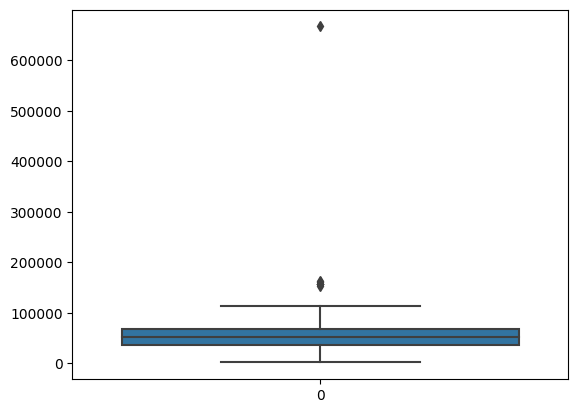

In [38]:
sns.boxplot(df['Income'])

In [39]:
df = df[df['Income'] < 500000]

<AxesSubplot: >

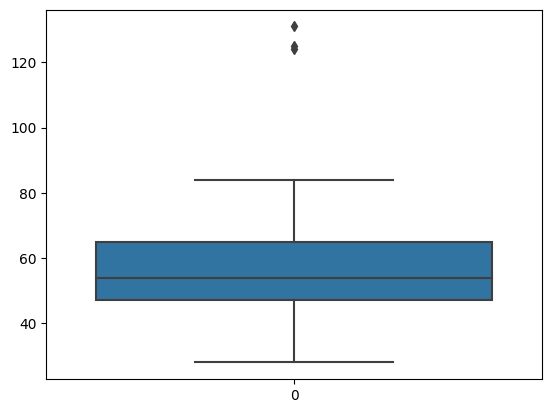

In [40]:
sns.boxplot(df['Customers_age'])

In [41]:
df = df[df['Customers_age'] < 100]

<AxesSubplot: xlabel='Customers_age', ylabel='Density'>

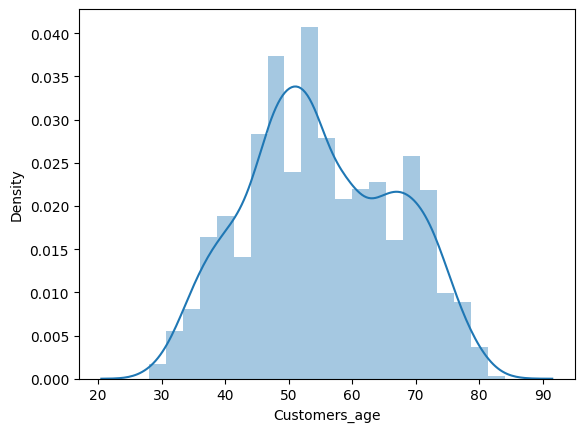

In [42]:
sns.distplot(df['Customers_age'], kde = True)

<AxesSubplot: xlabel='Education', ylabel='Income'>

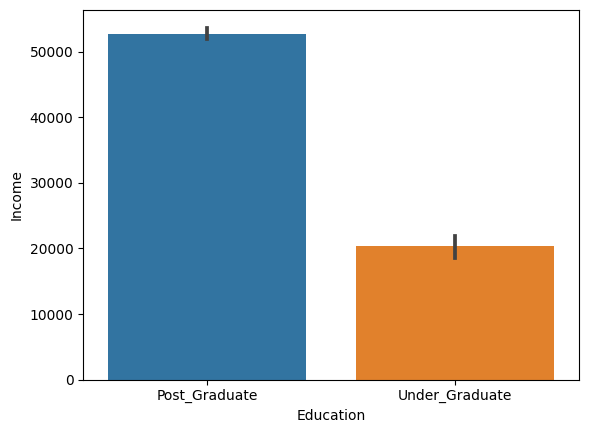

In [43]:
sns.barplot(x = df['Education'], y = df['Income'], data = df)

<AxesSubplot: xlabel='Education', ylabel='Total_Amount'>

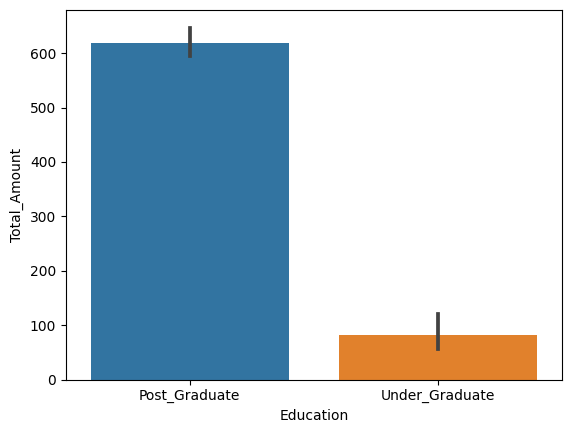

In [44]:
sns.barplot(x = df['Education'], y = df['Total_Amount'], data = df)

<AxesSubplot: xlabel='Marital_Status', ylabel='Total_Amount'>

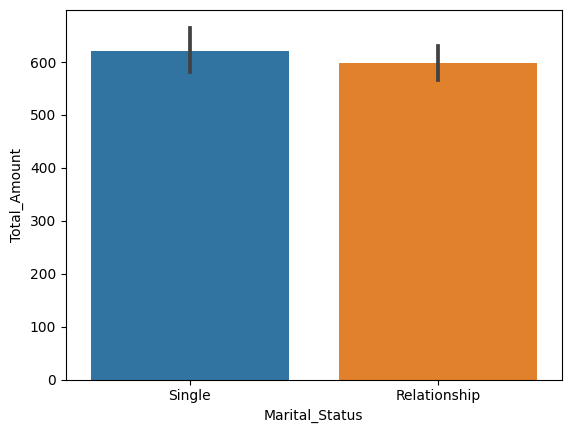

In [45]:
sns.barplot(x = df['Marital_Status'], y = df['Total_Amount'], data = df)

<AxesSubplot: xlabel='Child', ylabel='Total_Amount'>

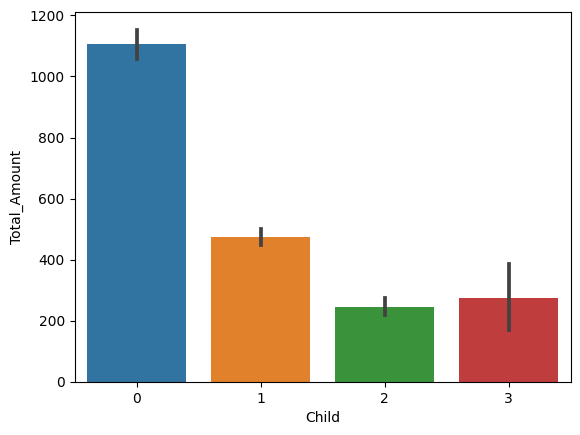

In [46]:
sns.barplot(x = df['Child'], y = df['Total_Amount'], data = df)

<AxesSubplot: xlabel='Total_offer', ylabel='Total_Purchases'>

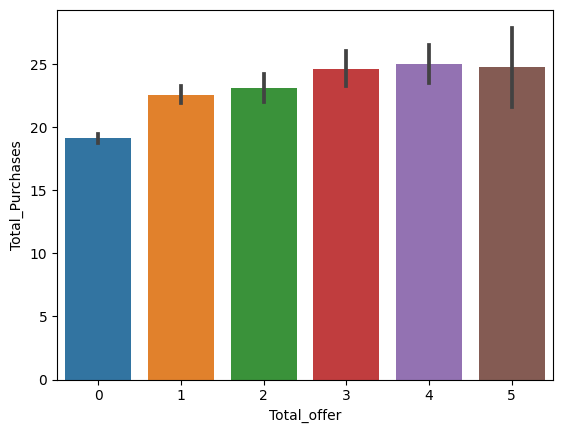

In [47]:
sns.barplot(x = df['Total_offer'], y = df['Total_Purchases'], data = df)

In [48]:
df.drop(['ID','Complain','Education','Customers_age'],axis = 1, inplace = True)

In [49]:
ndf = df

In [50]:
ndf.columns

Index(['Marital_Status', 'Income', 'Child', 'Customer_days', 'Total_Amount',
       'Total_Purchases', 'Total_offer'],
      dtype='object')

In [51]:
from sklearn.preprocessing import LabelEncoder


In [52]:
le = LabelEncoder()
le.fit(ndf['Marital_Status'])
ndf['Marital_Status'] = le.transform(ndf['Marital_Status'])

<AxesSubplot: >

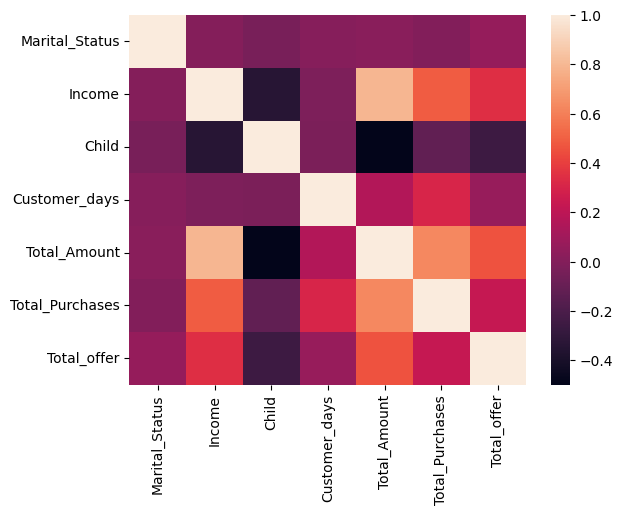

In [53]:
sns.heatmap(ndf.corr())

In [54]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init ='k-means++', random_state = 42)
    kmeans.fit(ndf)
    wcss.append(kmeans.inertia_)

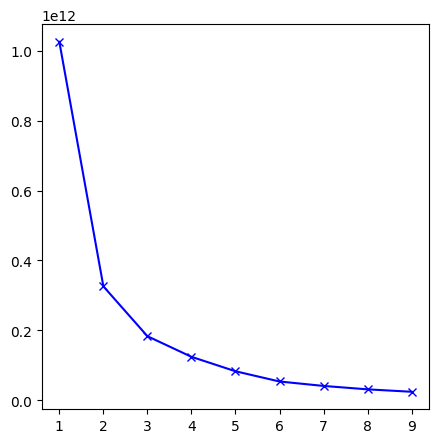

In [55]:
plt.figure(figsize = (5,5))
plt.plot(range(1,10),wcss, 'bx-')
plt.show()

In [56]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(ndf)
predn = kmeans.predict(ndf)

In [57]:
predn

array([1, 0, 1, ..., 1, 1, 1])

In [58]:
from sklearn.metrics import silhouette_score

score = silhouette_score(ndf, predn, metric = 'euclidean')

In [59]:
score

0.5982651517989682

In [60]:
ndf['cluster_value'] = predn

In [61]:
ndf

,Marital_Status,Income,Child,Customer_days,Total_Amount,Total_Purchases,Total_offer,cluster_value
0,1,58138.0,0,663,1617,32,1,1
1,1,46344.0,2,113,27,11,0,0
2,0,71613.0,0,312,776,25,0,1
3,0,26646.0,1,139,53,14,0,0
4,0,58293.0,1,161,422,24,0,1
...,...,...,...,...,...,...,...,...
2235,0,61223.0,1,381,1341,23,0,1
2236,0,64014.0,3,19,444,29,1,1
2237,1,56981.0,0,155,1241,25,1,1
2238,0,69245.0,1,156,843,26,0,1


In [100]:
ndf.to_csv('raw.csv')

<AxesSubplot: xlabel='cluster_value', ylabel='count'>

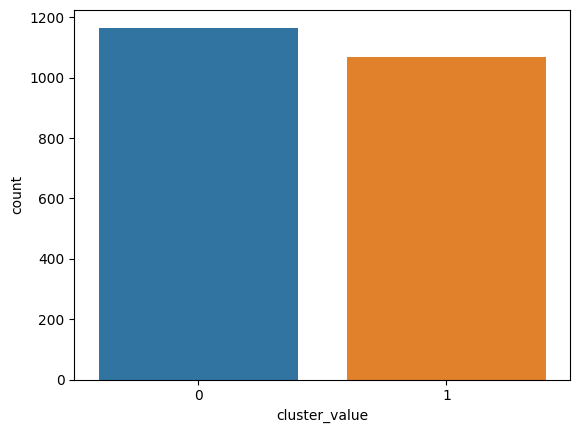

In [62]:
sns.countplot(x = ndf['cluster_value'])

<AxesSubplot: xlabel='Income', ylabel='Total_Purchases'>

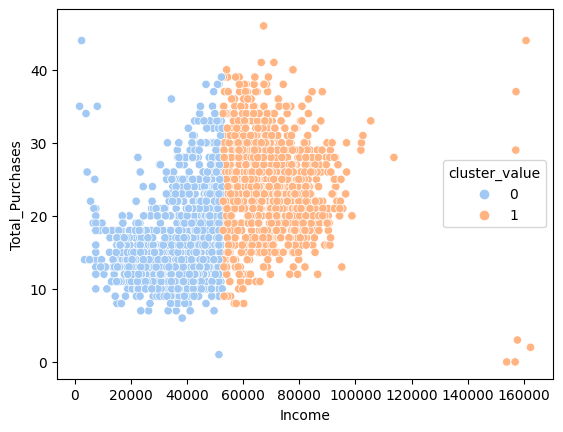

In [63]:
sns.scatterplot(data = ndf, x="Income", y="Total_Purchases", hue="cluster_value", palette="pastel")

<AxesSubplot: xlabel='Total_Purchases', ylabel='Total_Amount'>

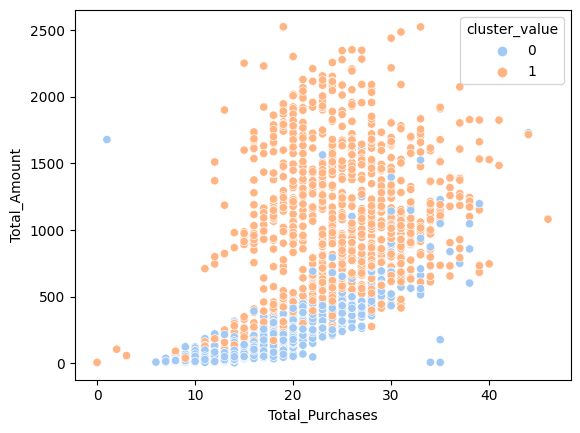

In [64]:
sns.scatterplot(data = ndf, x="Total_Purchases",y = "Total_Amount", hue="cluster_value", palette="pastel")

In [65]:
X = ndf.drop('cluster_value', axis = 1)
y = ndf['cluster_value']

In [66]:
X

,Marital_Status,Income,Child,Customer_days,Total_Amount,Total_Purchases,Total_offer
0,1,58138.0,0,663,1617,32,1
1,1,46344.0,2,113,27,11,0
2,0,71613.0,0,312,776,25,0
3,0,26646.0,1,139,53,14,0
4,0,58293.0,1,161,422,24,0
...,...,...,...,...,...,...,...
2235,0,61223.0,1,381,1341,23,0
2236,0,64014.0,3,19,444,29,1
2237,1,56981.0,0,155,1241,25,1
2238,0,69245.0,1,156,843,26,0


In [92]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [95]:
train_data = x_train

In [97]:
train_data['cluster_value'] = y_train

In [101]:
train_data.to_csv('train.csv')

In [102]:
test_data = x_test

In [103]:
test_data['cluster_value'] = y_test

In [104]:
test_data.to_csv('test.csv')

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

   ('impute_Education',SimpleImputer(strategy = 'most_frequent'),[0]),
    ('impute_Income',SimpleImputer(strategy = 'median'),[2]),
    ('impute_Child',SimpleImputer(strategy = 'most_frequent'),[3]),
    ('impute_Customer_days',SimpleImputer(),[4]),
    ('impute_Total_Amount',SimpleImputer(),[5]),
    ('impute_Total_Purchases',SimpleImputer(),[6]),
    ('impute_Total_Offer',SimpleImputer(strategy = 'most_frequent'),[7]),
    ('impute_Customers_age',SimpleImputer(),[8]),

In [69]:
X.columns

Index(['Marital_Status', 'Income', 'Child', 'Customer_days', 'Total_Amount',
       'Total_Purchases', 'Total_offer'],
      dtype='object')

In [70]:
num_med = ['Income']

num_mean = ['Customer_days',
       'Total_Amount', 'Total_Purchases']
num_freq = ['Marital_Status', 'Child', 'Total_offer']
#cat_col = ['Marital_Status']

In [71]:
pipe1 = Pipeline(
    steps = [
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [72]:
pipe2 = Pipeline(
    steps = [
    ('imputer',SimpleImputer()),
    ('scaler',StandardScaler())
])

In [73]:
pipe3 = Pipeline(
    steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('scaler',StandardScaler())
])

In [74]:
pipe4 = Pipeline( steps = [
    ('Encoder', LabelEncoder())
]) 

In [75]:


pipe5 = Pipeline( steps = [
    ('scale', StandardScaler(),slice(0,9))
])

In [76]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [77]:
cmt = ColumnTransformer(
    [
       ('pipe1',pipe1,num_med),
       ('pipe2',pipe2,num_mean),
       ('pipe3',pipe3,num_freq),
       
       
    ]
)

In [78]:
cmt.fit(x_train,y_train)

ColumnTransformer(transformers=[('pipe1',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Income']),
                                ('pipe2',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Customer_days', 'Total_Amount',
                                  'Total_Purchases']),
                                ('pipe3',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', StandardScaler())]),
                                 ['Marital_Status', 'Child', 'Total_offer'])])

In [79]:
cmt.get_feature_names_out()

array(['pipe1__Income', 'pipe2__Customer_days', 'pipe2__Total_Amount',
       'pipe2__Total_Purchases', 'pipe3__Marital_Status', 'pipe3__Child',
       'pipe3__Total_offer'], dtype=object)

In [80]:
x_train=pd.DataFrame(cmt.fit_transform(x_train),columns=cmt.get_feature_names_out())

In [81]:
x_train

,pipe1__Income,pipe2__Customer_days,pipe2__Total_Amount,pipe2__Total_Purchases,pipe3__Marital_Status,pipe3__Child,pipe3__Total_offer
0,0.155998,1.327983,0.483930,1.484898,1.350892,0.079271,-0.506208
1,0.943406,0.752825,1.201794,0.253385,1.350892,0.079271,-0.506208
2,0.720492,0.861907,0.779327,3.537420,-0.740252,1.413240,-0.506208
3,0.106706,-1.294935,-0.615144,-0.978128,-0.740252,0.079271,-0.506208
4,1.892407,-0.908191,2.127591,0.116550,-0.740252,-1.254698,1.830709
...,...,...,...,...,...,...,...
1560,2.104554,-0.104953,2.196902,0.800724,-0.740252,-1.254698,4.167626
1561,-1.725525,0.366081,-0.861032,-0.430789,1.350892,1.413240,-0.506208
1562,-0.082739,0.128085,-0.329648,0.116550,-0.740252,-1.254698,-0.506208
1563,-0.198268,0.747867,-0.146469,0.527054,1.350892,0.079271,-0.506208


In [82]:
x_test=pd.DataFrame(cmt.transform(x_test),columns=cmt.get_feature_names_out())

In [83]:
x_test

,pipe1__Income,pipe2__Customer_days,pipe2__Total_Amount,pipe2__Total_Purchases,pipe3__Marital_Status,pipe3__Child,pipe3__Total_offer
0,-0.234406,-1.240395,-0.894038,-0.978128,-0.740252,1.413240,-0.506208
1,-0.681077,-0.759444,-0.956748,-1.388633,-0.740252,0.079271,0.662251
2,1.041429,0.375998,1.127532,0.253385,1.350892,-1.254698,-0.506208
3,1.407023,0.951156,1.614359,0.116550,1.350892,0.079271,0.662251
4,0.068367,1.461856,0.302402,2.305907,-0.740252,1.413240,0.662251
...,...,...,...,...,...,...,...
666,0.230895,-1.240395,-0.902289,-1.662303,-0.740252,0.079271,-0.506208
667,-1.331330,-0.481781,-0.763667,-0.293954,-0.740252,0.079271,-0.506208
668,0.168496,1.446981,0.038360,1.621733,-0.740252,1.413240,0.662251
669,0.054558,0.306582,-0.559035,0.527054,-0.740252,1.413240,0.662251


In [84]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [85]:
model.score(x_train,y_train)

1.0

In [86]:
y_pred = model.predict(x_test)

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [88]:
accuracy_score(y_test,y_pred)

1.0

In [89]:
confusion_matrix(y_test,y_pred)

array([[359,   0],
       [  0, 312]], dtype=int64)

In [90]:
import pickle

pickle_out = open("model.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [91]:
x_train['pipe3__Marital_Status'].unique()

array([ 1.3508922 , -0.74025151])